## CLOTHING APPAREL CLASSIFICATON

In [1]:
#importing necessary libraries
import numpy as np
from keras.datasets import fashion_mnist

### LOADING THE DATA

In [2]:
#loading fashion MNIST dataset
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [3]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


### VIEWING SAMPLE IMAGES

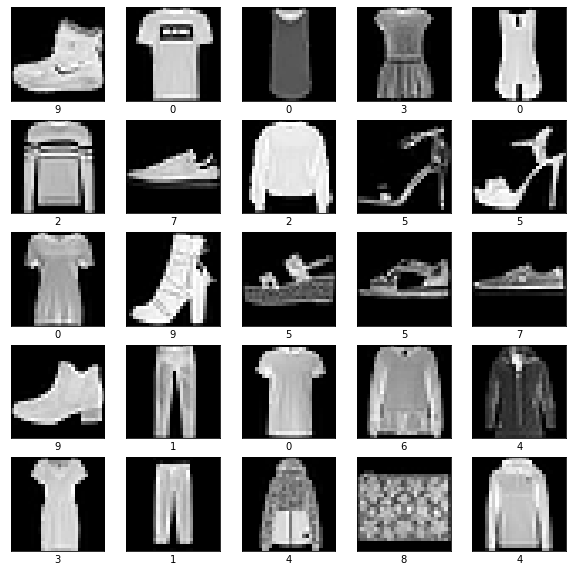

In [4]:
#importing visualization library
import matplotlib.pyplot as plt
import math
# Plotting 5 images, Subplot arugments represent nrows, ncols and index and  Color map is set to grey since image dataset is grayscale
images_to_display = 25
image_cells = math.ceil(math.sqrt(images_to_display))
plt.figure(figsize=(10,10))
for i in range(images_to_display):
    plt.subplot(image_cells, image_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.xlabel(y_train[i])
plt.show()

### RESHAPING THE DATA

In [5]:
# Save image parameters to the constants 
(IMAGES, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1
print('IMAGES: ', IMAGES);
print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGES:  60000
IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [6]:
x_train= x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [7]:
print('x_train_with_chanels:', x_train.shape)
print('x_test_with_chanels:', x_test.shape)

x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


In [8]:
# Changing image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [9]:
# Normalizing the data by changing the image pixel range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

In [10]:
#  checking one row from the 0th image to see color chanel values after normalization.
x_train[0][18]

array([[0.01176471],
       [0.7921569 ],
       [0.89411765],
       [0.8784314 ],
       [0.8666667 ],
       [0.827451  ],
       [0.827451  ],
       [0.8392157 ],
       [0.8039216 ],
       [0.8039216 ],
       [0.8039216 ],
       [0.8627451 ],
       [0.9411765 ],
       [0.3137255 ],
       [0.5882353 ],
       [1.        ],
       [0.8980392 ],
       [0.8666667 ],
       [0.7372549 ],
       [0.6039216 ],
       [0.7490196 ],
       [0.8235294 ],
       [0.8       ],
       [0.81960785],
       [0.87058824],
       [0.89411765],
       [0.88235295],
       [0.        ]], dtype=float32)

### CREATING THE MODEL

In [11]:
#importing necessary keras specific libraries
from keras.utils import np_utils
import keras
from keras.models import  Sequential
from keras.layers import Dense, Dropout ,Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization


In [12]:
#performing one hot encoding
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
# Calculate the number of classes 
num_classes = y_test.shape[1]

In [13]:
 #creating cnn model
model=Sequential()
model.add(Conv2D(input_shape=(28,28,1),filters=32,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes,activation='softmax'))


In [14]:
#compiling the model
import tensorflow as tf
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                        

### TRANING THE MODEL

In [16]:
# Setting Training Parameters like batch_size, epochs
epochs = 10
model_fitting = model.fit(x_train, y_train,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 340s 181ms/step - loss: 1.9488 - accuracy: 0.4011 - val_loss: 0.8581 - val_accuracy: 0.7045
Epoch 2/10
1875/1875 [==============================] - 342s 183ms/step - loss: 1.1816 - accuracy: 0.6173 - val_loss: 0.6960 - val_accuracy: 0.7537
Epoch 3/10
1875/1875 [==============================] - 324s 173ms/step - loss: 0.9961 - accuracy: 0.6730 - val_loss: 0.6248 - val_accuracy: 0.7782
Epoch 4/10
1875/1875 [==============================] - 348s 185ms/step - loss: 0.9044 - accuracy: 0.7024 - val_loss: 0.5864 - val_accuracy: 0.7919
Epoch 5/10
1875/1875 [==============================] - 338s 180ms/step - loss: 0.8295 - accuracy: 0.7243 - val_loss: 0.5556 - val_accuracy: 0.8047
Epoch 6/10
1875/1875 [==============================] - 329s 175ms/step - loss: 0.7831 - accuracy: 0.7397 - val_loss: 0.5344 - val_accuracy: 0.8124
Epoch 7/10
1875/1875 [==============================] - 339s 181ms/step - loss: 0.7528 - accuracy: 0.7506 - val_

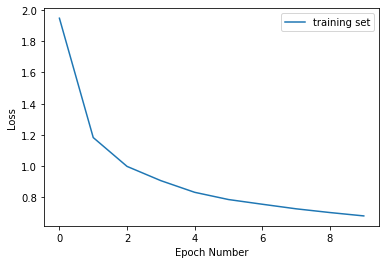

In [17]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(model_fitting.history['loss'], label='training set')
plt.legend()

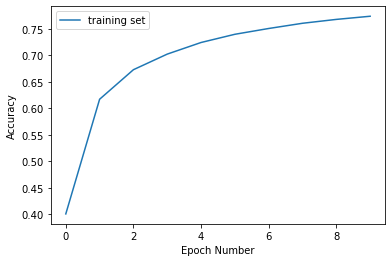

In [18]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(model_fitting.history['accuracy'], label='training set')

plt.legend()

### EVALUATING ACCURACY AND LOSS

In [19]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.45320045948028564
Test accuracy: 0.8428500294685364


In [20]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.48076245188713074
Test accuracy: 0.8317000269889832


### MAKING PREDICTIONS

In [21]:
import pandas as pd
predictions = model.predict([x_test])

In [22]:
print('predictions:', predictions.shape)

predictions: (10000, 10)


In [23]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions)

,0,1,2,3,4,5,6,7,8,9
0,0.000288,0.000259,0.000071,0.000208,0.000035,3.479313e-03,6.549366e-05,0.079986,1.496845e-03,0.914111
1,0.000167,0.000044,0.996123,0.001090,0.000500,2.699479e-05,4.250623e-04,0.000041,6.305578e-04,0.000951
2,0.000021,0.999935,0.000004,0.000017,0.000018,9.971951e-07,3.884983e-07,0.000001,9.409504e-07,0.000003
3,0.000007,0.999473,0.000054,0.000206,0.000215,9.453860e-06,7.175147e-06,0.000009,1.130210e-05,0.000008
4,0.012225,0.002594,0.086631,0.005604,0.012734,1.074295e-02,8.588609e-01,0.001012,2.518666e-03,0.007077
...,...,...,...,...,...,...,...,...,...,...
9995,0.000040,0.000005,0.000003,0.000002,0.000005,4.336795e-05,1.102510e-06,0.000869,3.889477e-05,0.998992
9996,0.000239,0.986730,0.000533,0.010607,0.000898,2.403889e-04,4.289736e-05,0.000231,4.077202e-04,0.000070
9997,0.028966,0.000070,0.002075,0.087042,0.001039,4.877192e-03,4.848728e-02,0.000315,8.257511e-01,0.001378
9998,0.000035,0.998288,0.000052,0.001356,0.000162,1.192619e-05,9.005737e-06,0.000058,1.648760e-05,0.000011


In [24]:
#  extract predictions with highest probabilites 
prediction_s = np.argmax(predictions, axis=1)
pd.DataFrame(prediction_s)

,0
0,9
1,2
2,1
3,1
4,6
...,...
9995,9
9996,1
9997,8
9998,1


In [35]:
print(prediction_s[0])
if prediction_s[0] == 0:
  print("T-shirt/top")
elif prediction_s[0] == 1:
  print("Trouser") 
elif prediction_s[0] == 2:
  print("Pullover") 
elif prediction_s[0] == 3:
  print("Dress") 
elif prediction_s[0] == 4:
  print("Coat") 
elif prediction_s[0] == 5:
  print("Sandal")
elif prediction_s[0] == 6:
  print("Shirt") 
elif prediction_s[0] == 7:
  print("Sneaker") 
elif prediction_s[0] == 8:
  print("Bag") 
else:
  print( "Ankle boot")

9
Ankle boot


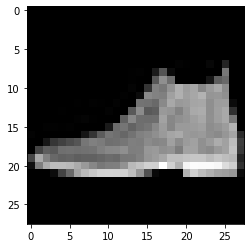

In [26]:
plt.imshow(x_test[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.get_cmap('gray'))
plt.show()

In [27]:
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [31]:
y_test_modified=np.argmax(y_test, axis=1)


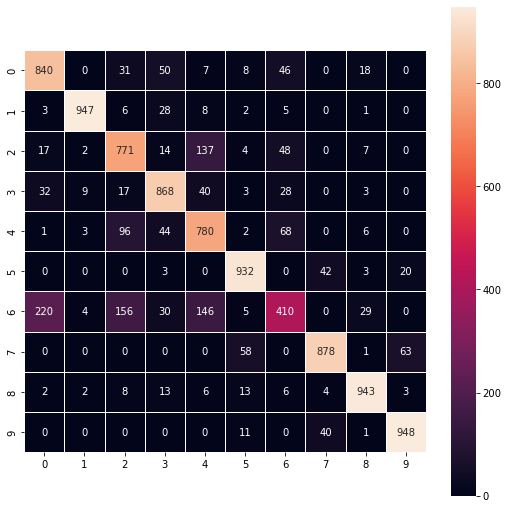

In [34]:
import seaborn as sn
confusion_matrix = tf.math.confusion_matrix(y_test_modified, prediction_s)
plt.figure(figsize=(9,9))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
)
plt.show()